In [23]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
# Load the training data
train_data = pd.read_csv('data/train_energy.csv')

# Convert DateTime column to datetime type
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])

# Display the first few rows of the training data
train_data.head()

,DateTime,EnergyConsumption(kWh)
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


In [25]:
# Preprocess the data for Prophet
# Rename columns to 'ds' for DateTime and 'y' for the target variable
train_data.rename(columns={'DateTime': 'ds', 'EnergyConsumption(kWh)': 'y'}, inplace=True)

# Split the data into training and validation sets based on time
cutoff_date = '2016-12-01'  # Example cutoff date
train = train_data[train_data['ds'] < cutoff_date]
val = train_data[train_data['ds'] >= cutoff_date]

# Initialize the Prophet model
model = Prophet()

# Fit the model on the training data
model.fit(train)

23:28:33 - cmdstanpy - INFO - Chain [1] start processing
23:28:34 - cmdstanpy - INFO - Chain [1] done processing


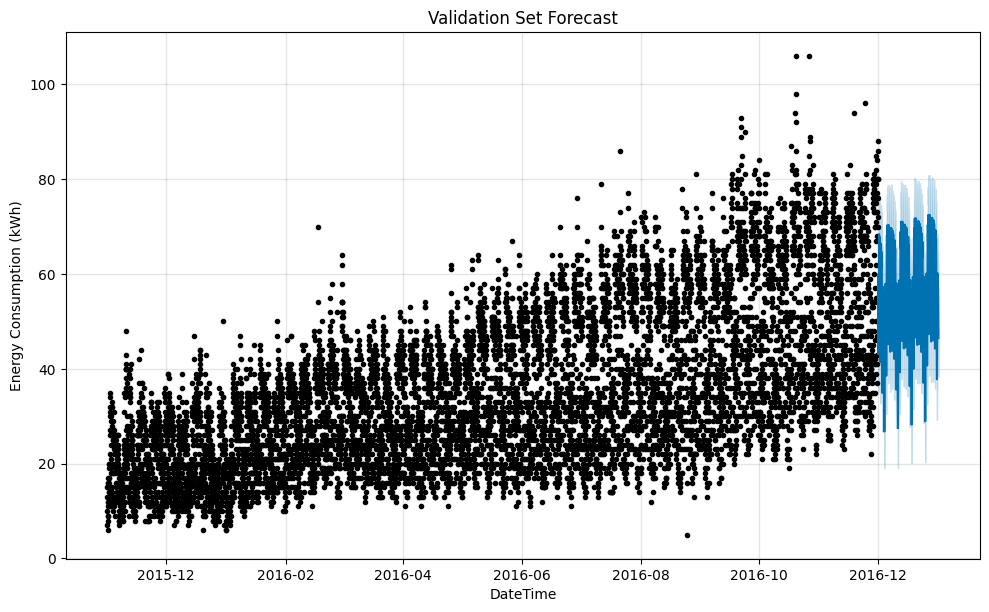

Validation RMSE: 11.532071286058935


In [26]:
# Validate the model on the validation set
val_forecast = model.predict(val)

# Visualize the forecast on the validation set
fig = model.plot(val_forecast)
plt.title('Validation Set Forecast')
plt.xlabel('DateTime')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

# Calculate RMSE on the validation set
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(val['y'], val_forecast['yhat']))
print(f'Validation RMSE: {rmse}')

In [27]:
# Load the test data
test_data = pd.read_csv('data/test_energy.csv')

# Preprocess the test data
# Rename the 'DateTime' column to 'ds'
test_data.rename(columns={'DateTime': 'ds'}, inplace=True)

# Make predictions on the test data
forecast = model.predict(test_data)

In [28]:
# Prepare the submission file
# Create a DataFrame with 'DateTime' and predicted 'EnergyConsumption(kWh)'
submission = test_data[['ds']].copy()
submission['EnergyConsumption(kWh)'] = forecast['yhat']
submission.rename(columns={'ds': 'DateTime'}, inplace=True)

# Save the submission file
submission.to_csv('prophet_submission.csv', index=False)

# Display the first few rows of the submission file
print(submission.head())

              DateTime  EnergyConsumption(kWh)
0  2017-01-01 01:00:00               41.946051
1  2017-01-01 02:00:00               37.273171
2  2017-01-01 03:00:00               33.359231
3  2017-01-01 04:00:00               30.763843
4  2017-01-01 05:00:00               29.652571
